<a href="https://colab.research.google.com/github/aryaayush190/Maths-for-Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

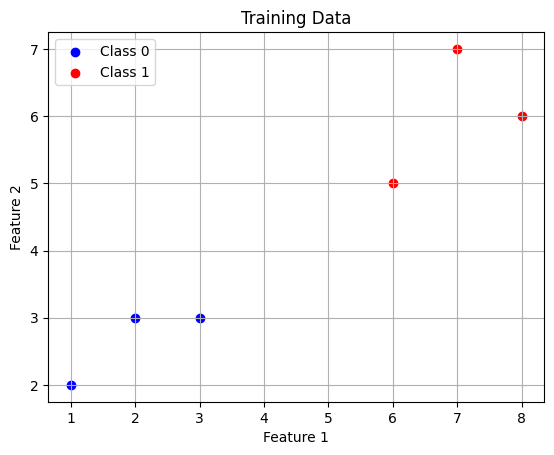

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Example dataset
X_train = np.array([[1,2],[2,3],[3,3],[6,5],[7,7],[8,6]])
y_train = np.array([0,0,0,1,1,1])  # 0 = blue, 1 = red

# Visualize dataset
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="blue", label="Class 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="red", label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Data")
plt.legend()
plt.grid(True)
plt.show()


In [1]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [3]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # 1. Compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # 2. Get k nearest
        k_indices = np.argsort(distances)[:self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_indices]
        # 3. Majority vote
        most_common = max(set(k_neighbor_labels), key=k_neighbor_labels.count)
        return most_common


In [6]:
# New points to classify
X_test = np.array([[5,5],[2,2],[7,6]])

knn = KNN(k=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print("Test Points:", X_test)
print("Predictions:", predictions)


Test Points: [[5 5]
 [2 2]
 [7 6]]
Predictions: [1 0 1]


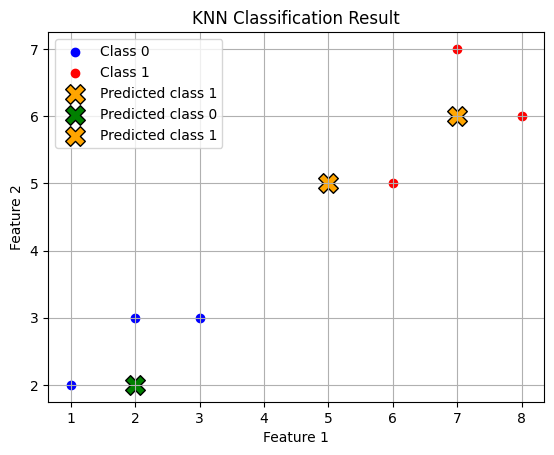

In [7]:
# Plot training data
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="blue", label="Class 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="red", label="Class 1")

# Plot test data
for point, pred in zip(X_test, predictions):
    plt.scatter(point[0], point[1], color="green" if pred==0 else "orange",
                marker="X", s=200, edgecolor="black", label=f"Predicted class {pred}")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Classification Result")
plt.legend()
plt.grid(True)
plt.show()
